In [305]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler

In [306]:
df = pd.read_csv('income_evaluation.csv')
df.shape

(32561, 15)

In [307]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [308]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [309]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [310]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

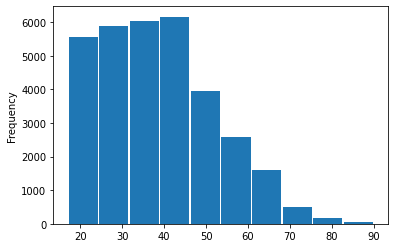

In [311]:
df['age'].plot(kind='hist', rwidth=0.95)
plt.show()

### Working Class 

In [312]:
df[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [313]:
df = df[df[' workclass'] != ' Without-pay']

In [314]:
df = df[df[' workclass'] != ' Never-worked']

In [315]:
df[' occupation'][df[' workclass'] == ' ?'].value_counts()

 ?    1836
Name:  occupation, dtype: int64

#### Those who do not have workclass also don't have an occupation 

In [316]:
df = df[df[' workclass'] != ' ?']

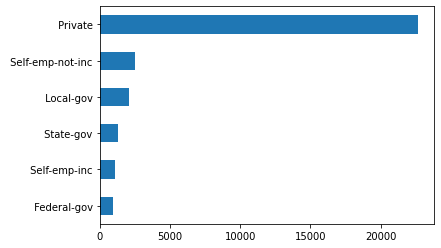

In [317]:
df[' workclass'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [318]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc'], dtype=object)

In [319]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [320]:
df[' education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1019
 10th             831
 7th-8th          572
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name:  education, dtype: int64

### Checking income type of people who are educated at school level

In [321]:
df[df[' education'] == ' 9th'][' income'].value_counts()

 <=50K    437
 >50K      26
Name:  income, dtype: int64

In [322]:
df[df[' education'] == ' 10th'][' income'].value_counts()

 <=50K    771
 >50K      60
Name:  income, dtype: int64

In [323]:
df[df[' education'] == ' 11th'][' income'].value_counts()

 <=50K    996
 >50K      60
Name:  income, dtype: int64

In [324]:
df[df[' education'] == ' 12th'][' income'].value_counts()

 <=50K    362
 >50K      31
Name:  income, dtype: int64

In [325]:
df[df[' education'] == ' Preschool'][' income'].value_counts()

 <=50K    46
Name:  income, dtype: int64

## **Replacing**
**Preschool,**
**1st-4th,**
**5th-6th,**
**7th-8th and**
**9th** 
## **with elementary**


In [327]:
elemen_cols = [' Preschool', ' 1st-4th', ' 5th-6th',' 7th-8th', ' 9th']

In [328]:
df[' education'].replace(elemen_cols,['Elementary' for i in range(5)], inplace=True)
df[' education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 Masters         1675
Elementary       1540
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1019
 10th             831
 Prof-school      558
 Doctorate        398
 12th             393
Name:  education, dtype: int64

## **Replacing**
**10th, 11th and 12th**

## **with High School**


In [329]:
high_school_cols = [' 10th', ' 11th', ' 12th']

df[' education'].replace(high_school_cols,['High_School' for i in range(3)], inplace=True)
df[' education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
High_School      2280
 Masters         1675
Elementary       1540
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name:  education, dtype: int64

In [330]:
df[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3767
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [331]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

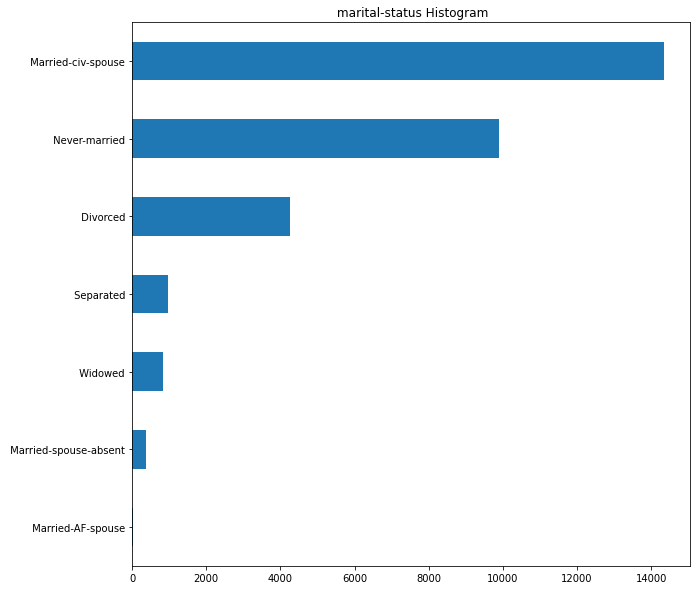

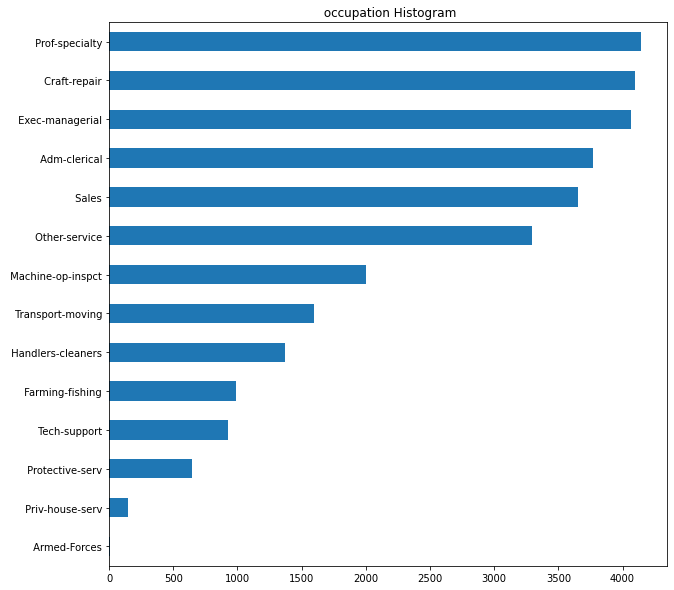

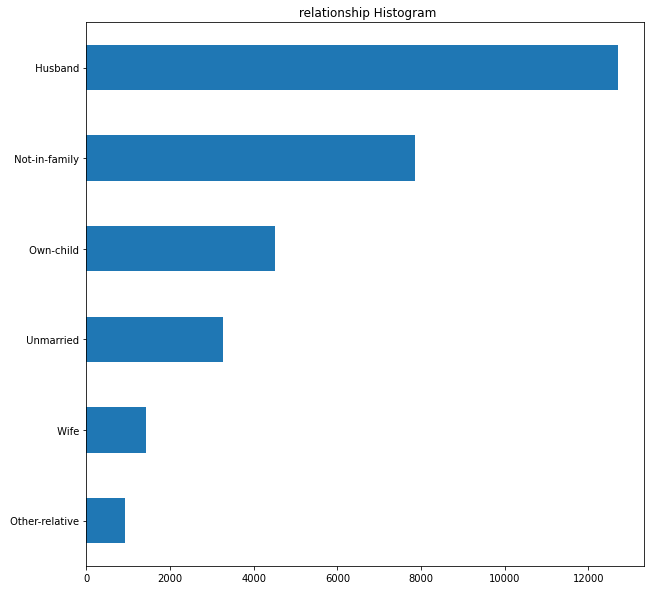

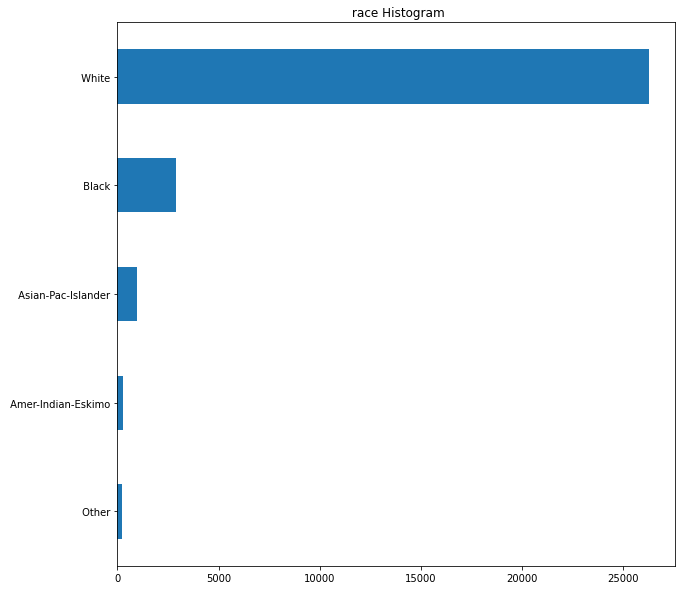

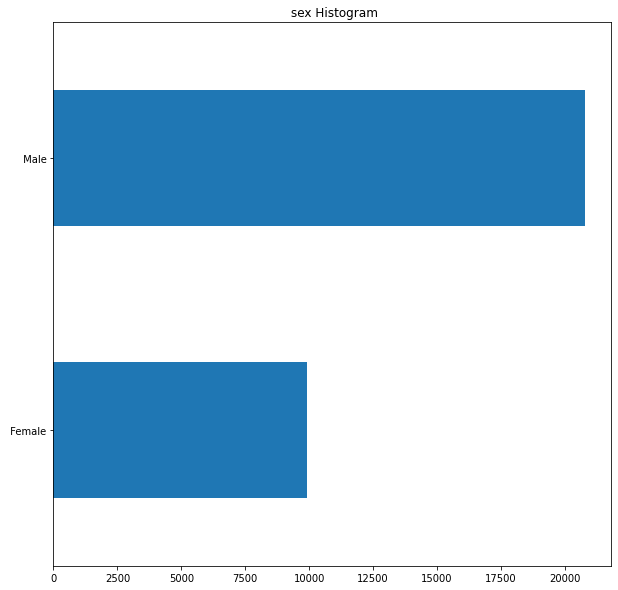

In [332]:
columns = [' marital-status', ' occupation', ' relationship', ' race', ' sex']

for column in columns:
    plt.figure(figsize=(10,10))
    df[column].value_counts().plot(kind='barh')
    plt.title(f'{column} Histogram')
    plt.gca().invert_yaxis()
    plt.show()
    print()

In [335]:
df.shape

(30704, 15)

In [333]:
df[df[' capital-gain'] == 0].shape

(28117, 15)

In [334]:
df[df[' capital-loss'] == 0].shape

(29243, 15)

### dropping capital-gain and capital-loss columns

In [336]:
df.drop([' capital-gain', ' capital-loss'],axis=1, inplace=True)

In [337]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

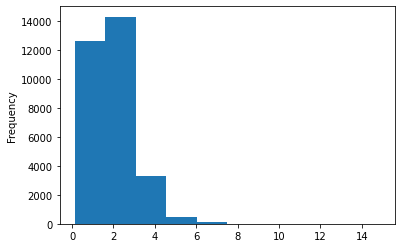

In [338]:
(df[' fnlwgt']/100000).plot(kind='hist')
plt.show()

In [339]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
9445,36,Private,370156,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,38,United-States,<=50K
15668,62,Federal-gov,258124,Masters,14,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,Italy,>50K
6769,33,Local-gov,173005,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,45,United-States,>50K
20136,44,Private,377018,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K
7476,41,Private,147206,High_School,8,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,40,United-States,>50K


## Scaling the columns 

In [340]:
cols_to_scale = ['age', ' fnlwgt', ' education-num', ' hours-per-week']
df[cols_to_scale].head()

,age,fnlwgt,education-num,hours-per-week
0,39,77516,13,40
1,50,83311,13,13
2,38,215646,9,40
3,53,234721,7,40
4,28,338409,13,40


In [341]:
scale = MinMaxScaler()
scale.fit(df[cols_to_scale])
scalled = scale.fit_transform(df[cols_to_scale])
df['age'] =  scalled[:,0]
df[' fnlwgt'] = scalled[:,1]
df[' education-num'] = scalled[:,2]
df[' hours-per-week'] = scalled[:,3]

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K
3,0.493151,Private,0.150212,High_School,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Cuba,<=50K


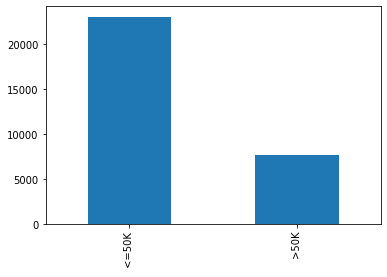

In [342]:
df[' income'].value_counts().plot(kind='bar')
plt.show()

In [345]:
df[' income'].value_counts()

 <=50K    23054
 >50K      7650
Name:  income, dtype: int64

In [346]:
less_50k = df[df[' income'] == ' <=50K'].sample(7650)
greater_50k = df[df[' income'] == ' >50K']

In [347]:
df[' native-country'].value_counts()

 United-States                 27491
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

### Putting countries = others where number of people < 100 and blank values

In [348]:
def get_country_count_less_than_100():
    countries = []
    country_count = df[' native-country'].value_counts() < 100
    for key,value in country_count.items():
        if value:
            countries.append(key)
    return countries


In [349]:
countries = get_country_count_less_than_100()

df[' native-country'].replace(countries, ['Others' for i in range(len(countries))],inplace=True)

In [350]:
df[' native-country'].replace(' ?', 'Others', inplace=True)

In [351]:
df[' native-country'].value_counts()

 United-States    27491
Others             1872
 Mexico             610
 Philippines        187
 Germany            128
 Puerto-Rico        109
 Canada             107
 El-Salvador        100
 India              100
Name:  native-country, dtype: int64

In [352]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K
3,0.493151,Private,0.150212,High_School,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Others,<=50K


In [353]:
df[' relationship'].value_counts()

 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name:  relationship, dtype: int64

## Replacing Husband and Wife values with married

In [354]:
df[' relationship'].replace([' Husband',' Wife'],['Married','Married'], inplace=True)

In [355]:
df[' relationship'].value_counts()

Married            14132
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Other-relative      918
Name:  relationship, dtype: int64

## Dropping marital-status because we have relationship status column

In [356]:
df.drop(' marital-status',axis=1, inplace=True)
df.sample(5)

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,hours-per-week,native-country,income
26856,0.082192,Private,0.230629,High_School,0.400000,Craft-repair,Unmarried,White,Male,0.346939,United-States,<=50K
15187,0.356164,Private,0.120622,Some-college,0.600000,Exec-managerial,Married,White,Male,0.551020,United-States,>50K
31616,0.150685,Private,0.118039,HS-grad,0.533333,Other-service,Other-relative,Other,Male,0.479592,Mexico,<=50K
29877,0.438356,Self-emp-not-inc,0.023608,HS-grad,0.533333,Exec-managerial,Married,White,Male,0.448980,United-States,<=50K
17287,0.561644,Private,0.091248,HS-grad,0.533333,Transport-moving,Married,White,Male,0.397959,United-States,>50K


In [357]:
df[' race'].value_counts()

 White                 26289
 Black                  2908
 Asian-Pac-Islander      973
 Amer-Indian-Eskimo      286
 Other                   248
Name:  race, dtype: int64

## Dropping 'race' Column because we have native-country column

In [358]:
df.drop(' race', axis=1, inplace=True)
df.sample(5)

,age,workclass,fnlwgt,education,education-num,occupation,relationship,sex,hours-per-week,native-country,income
16101,0.561644,Private,0.135353,HS-grad,0.533333,Handlers-cleaners,Not-in-family,Male,0.397959,United-States,<=50K
18698,0.027397,Private,0.056761,HS-grad,0.533333,Farming-fishing,Not-in-family,Male,0.397959,United-States,<=50K
21094,0.082192,Private,0.145367,High_School,0.466667,Machine-op-inspct,Own-child,Female,0.397959,United-States,<=50K
11078,0.424658,Private,0.152118,Bachelors,0.800000,Exec-managerial,Married,Male,0.653061,United-States,>50K
29919,0.082192,Private,0.249348,Some-college,0.600000,Adm-clerical,Married,Male,0.397959,United-States,>50K


In [360]:
df[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
Name:  workclass, dtype: int64

In [361]:
df[' education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
High_School      2280
 Masters         1675
Elementary       1540
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name:  education, dtype: int64

In [362]:
df[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3767
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [383]:
columns = [' Protective-serv',' Priv-house-serv',' Armed-Forces']
df[' occupation'].replace(columns, ['Others' for i in range(3)], inplace=True)

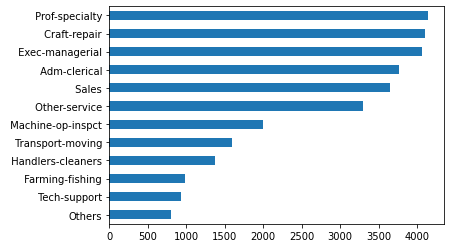

In [387]:
df[' occupation'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [388]:
df[' sex'].value_counts()

 Male      20779
 Female     9925
Name:  sex, dtype: int64

# Ready for one Hot Encoding 

In [389]:
df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,sex,hours-per-week,native-country,income
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Adm-clerical,Not-in-family,Male,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Exec-managerial,Married,Male,0.122449,United-States,<=50K
2,0.287671,Private,0.137244,HS-grad,0.533333,Handlers-cleaners,Not-in-family,Male,0.397959,United-States,<=50K
3,0.493151,Private,0.150212,High_School,0.400000,Handlers-cleaners,Married,Male,0.397959,United-States,<=50K
4,0.150685,Private,0.220703,Bachelors,0.800000,Prof-specialty,Married,Female,0.397959,Others,<=50K


In [390]:
cols_to_encode = [' workclass', ' education', ' occupation', ' relationship', ' sex', ' native-country']
df[cols_to_encode].head()

,workclass,education,occupation,relationship,sex,native-country
0,State-gov,Bachelors,Adm-clerical,Not-in-family,Male,United-States
1,Self-emp-not-inc,Bachelors,Exec-managerial,Married,Male,United-States
2,Private,HS-grad,Handlers-cleaners,Not-in-family,Male,United-States
3,Private,High_School,Handlers-cleaners,Married,Male,United-States
4,Private,Bachelors,Prof-specialty,Married,Female,Others


In [392]:
pd.get_dummies(data=df[cols_to_encode]).columns

Index([' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Private', ' workclass_ Self-emp-inc',
       ' workclass_ Self-emp-not-inc', ' workclass_ State-gov',
       ' education_ Assoc-acdm', ' education_ Assoc-voc',
       ' education_ Bachelors', ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Prof-school',
       ' education_ Some-college', ' education_Elementary',
       ' education_High_School', ' occupation_ Adm-clerical',
       ' occupation_ Craft-repair', ' occupation_ Exec-managerial',
       ' occupation_ Farming-fishing', ' occupation_ Handlers-cleaners',
       ' occupation_ Machine-op-inspct', ' occupation_ Other-service',
       ' occupation_ Prof-specialty', ' occupation_ Sales',
       ' occupation_ Tech-support', ' occupation_ Transport-moving',
       ' occupation_Others', ' relationship_ Not-in-family',
       ' relationship_ Other-relative', ' relationship_ Own-child',
       ' relationship_ Unmarried

In [394]:
pd.get_dummies(data=df[cols_to_encode], drop_first=True).columns

Index([' workclass_ Local-gov', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' education_ Assoc-voc',
       ' education_ Bachelors', ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Prof-school',
       ' education_ Some-college', ' education_Elementary',
       ' education_High_School', ' occupation_ Craft-repair',
       ' occupation_ Exec-managerial', ' occupation_ Farming-fishing',
       ' occupation_ Handlers-cleaners', ' occupation_ Machine-op-inspct',
       ' occupation_ Other-service', ' occupation_ Prof-specialty',
       ' occupation_ Sales', ' occupation_ Tech-support',
       ' occupation_ Transport-moving', ' occupation_Others',
       ' relationship_ Other-relative', ' relationship_ Own-child',
       ' relationship_ Unmarried', ' relationship_Married', ' sex_ Male',
       ' native-country_ El-Salvador', ' native-country_ Germany',
       ' native-cou

In [400]:
encoded_cols = pd.get_dummies(data=df[cols_to_encode], drop_first=True)

In [401]:
encoded_cols.shape

(30704, 38)

In [396]:
df.shape

(30704, 11)

In [405]:
new_df = pd.concat([df.drop(cols_to_encode, axis=1),encoded_cols], axis=1)

In [406]:
new_df.shape

(30704, 43)

In [415]:
new_df[' income'].replace([' <=50K', ' >50K'],[0,1], inplace=True)

In [416]:
new_df.sample(10)

,age,fnlwgt,education-num,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,relationship_Married,sex_ Male,native-country_ El-Salvador,native-country_ Germany,native-country_ India,native-country_ Mexico,native-country_ Philippines,native-country_ Puerto-Rico,native-country_ United-States,native-country_Others
23586,0.383562,0.105045,0.533333,0.397959,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
24959,0.356164,0.062659,0.533333,0.346939,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
16186,0.027397,0.077461,0.533333,0.295918,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
18644,0.082192,0.102045,0.600000,0.397959,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
30497,0.301370,0.161762,0.333333,0.142857,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29733,0.219178,0.030806,0.800000,0.448980,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
29273,0.575342,0.045779,0.600000,0.806122,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5364,0.356164,0.119839,0.533333,0.397959,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
8426,0.287671,0.108910,0.533333,0.448980,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
20358,0.410959,0.132870,0.266667,0.561224,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [418]:
new_df.to_csv('cleaned-income-classification.csv',index = )